In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
df = pd.read_csv("diabetes_cleaned.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,4,137,40,35,168,43.1,2.288,33,1


In [5]:
# Replace Insulin values < 70 with the median of values >= 70
# insulin_median = df[df['Insulin'] >= 70]['Insulin'].median()
# df.loc[df['Insulin'] < 70, 'Insulin'] = insulin_median

# Replace Glucose values < 70 with median of Glucose values >= 70
glucose_median = df[df['Glucose'] >= 80]['Glucose'].median()
df.loc[df['Glucose'] < 80, 'Glucose'] = glucose_median

bloodpressure_median = df[df['BloodPressure'] >= 70]['BloodPressure'].median()
df.loc[df['BloodPressure'] < 70, 'BloodPressure'] = bloodpressure_median

# Now df has updated Insulin values; no new file created
# You can continue working with df below
print(df.head())  # just to verify

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             78             29      125  26.6   
2            8      183             78             29      125  23.3   
3            1       89             78             23       94  28.1   
4            4      137             78             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [7]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


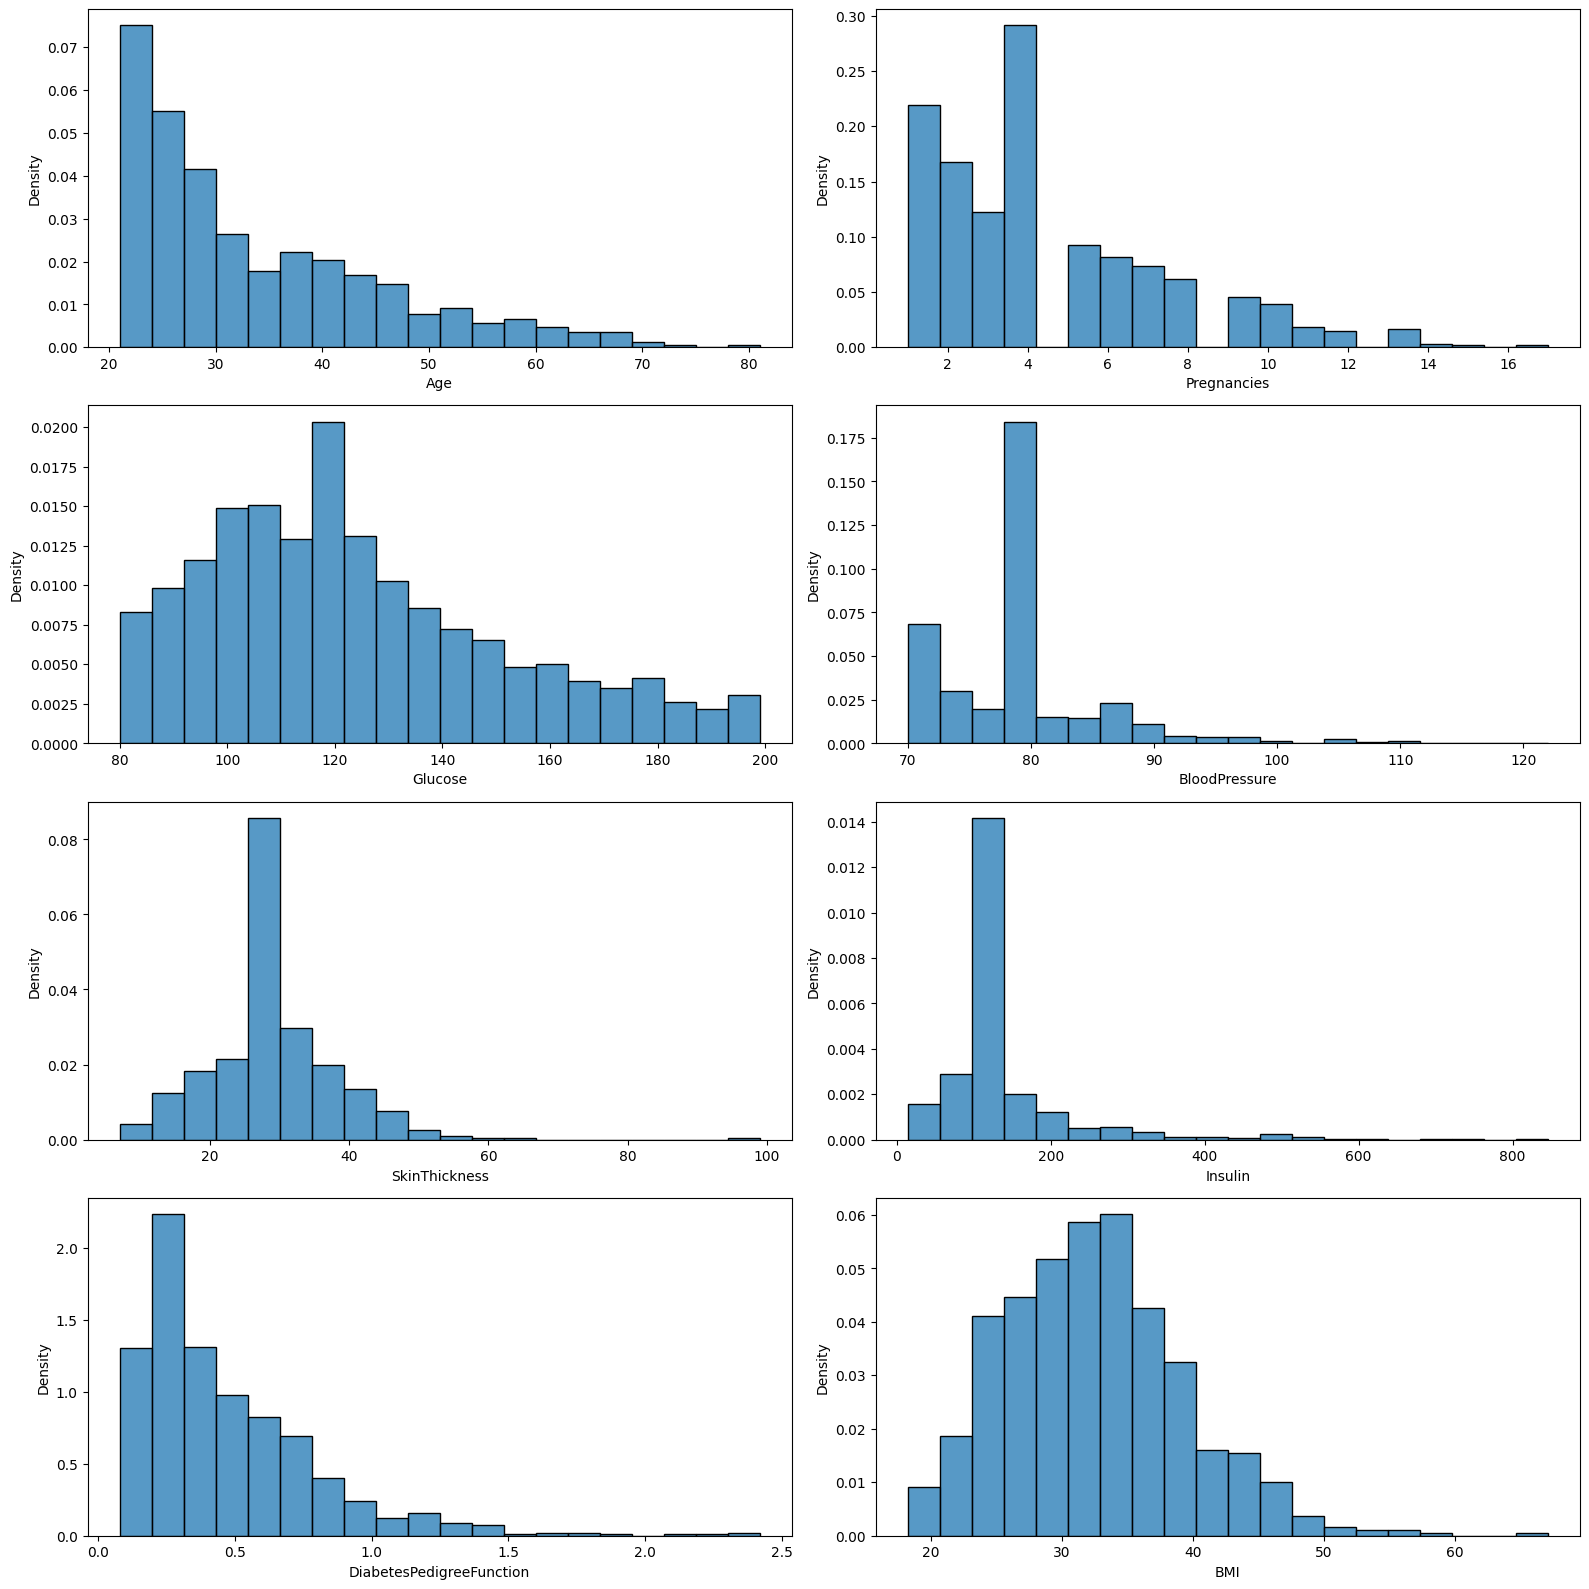

In [8]:
fig, ax = plt.subplots(4, 2, figsize=(16, 16))

# Plotting histograms with density on y-axis
sns.histplot(df.Age, bins=20, stat='density', ax=ax[0, 0])
sns.histplot(df.Pregnancies, bins=20, stat='density', ax=ax[0, 1])
sns.histplot(df.Glucose, bins=20, stat='density', ax=ax[1, 0])
sns.histplot(df.BloodPressure, bins=20, stat='density', ax=ax[1, 1])
sns.histplot(df.SkinThickness, bins=20, stat='density', ax=ax[2, 0])
sns.histplot(df.Insulin, bins=20, stat='density', ax=ax[2, 1])
sns.histplot(df.DiabetesPedigreeFunction, bins=20, stat='density', ax=ax[3, 0])
sns.histplot(df.BMI, bins=20, stat='density', ax=ax[3, 1])

plt.tight_layout()
plt.show()

C:\Users\asnmu\AppData\Local\Temp\ipykernel_29792\2137606690.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, ax=ax[1], palette=colors)


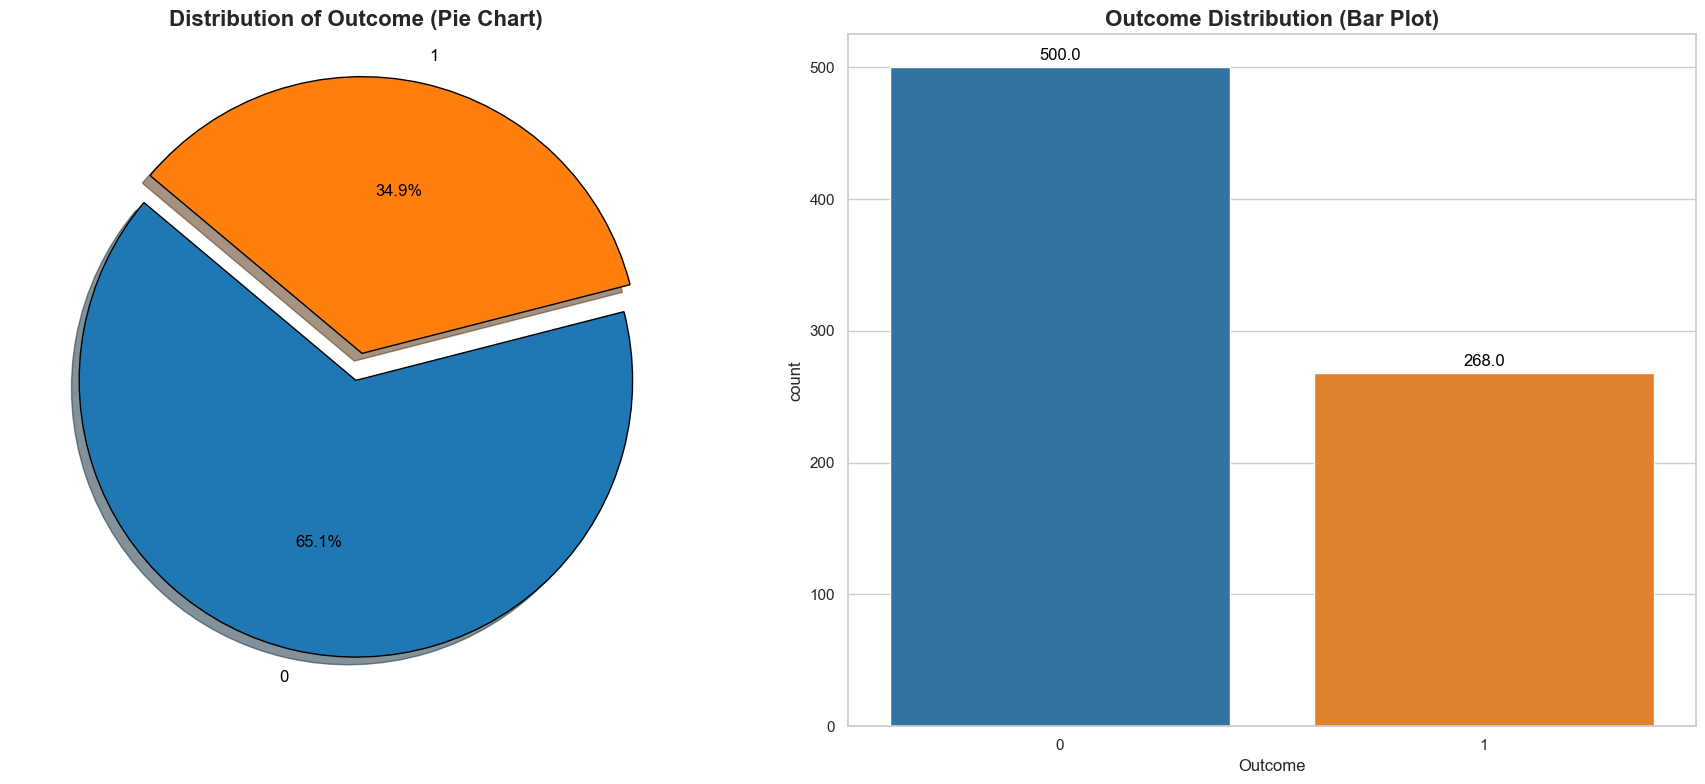

In [9]:
# Set theme and color palette
sns.set_theme(style="whitegrid")
colors = ['#1f77b4', '#ff7f0e']

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart with enhanced style
df['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True,
    colors=colors,
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
    textprops={'fontsize': 12, 'color': 'black'}
)
ax[0].set_title('Distribution of Outcome (Pie Chart)', fontsize=16, fontweight='bold')
ax[0].set_ylabel('')

# Countplot with color and labels
sns.countplot(x='Outcome', data=df, ax=ax[1], palette=colors)
ax[1].set_title('Outcome Distribution (Bar Plot)', fontsize=16, fontweight='bold')

# Add value labels on the bar plot
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height()}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='baseline',
                   fontsize=12, color='black',
                   xytext=(0, 5),
                   textcoords='offset points')

# Improve layout
plt.tight_layout()
plt.show()

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.160735,0.086896,0.126082,0.032397,0.100870,-0.009198,0.522303,0.248172
Glucose,0.160735,1.000000,0.120294,0.200576,0.407742,0.221749,0.127886,0.278158,0.476510
BloodPressure,0.086896,0.120294,1.000000,0.084643,0.038740,0.202738,0.014860,0.151085,0.073239
SkinThickness,0.126082,0.200576,0.084643,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.032397,0.407742,0.038740,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.100870,0.221749,0.202738,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.009198,0.127886,0.014860,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.522303,0.278158,0.151085,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.248172,0.476510,0.073239,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


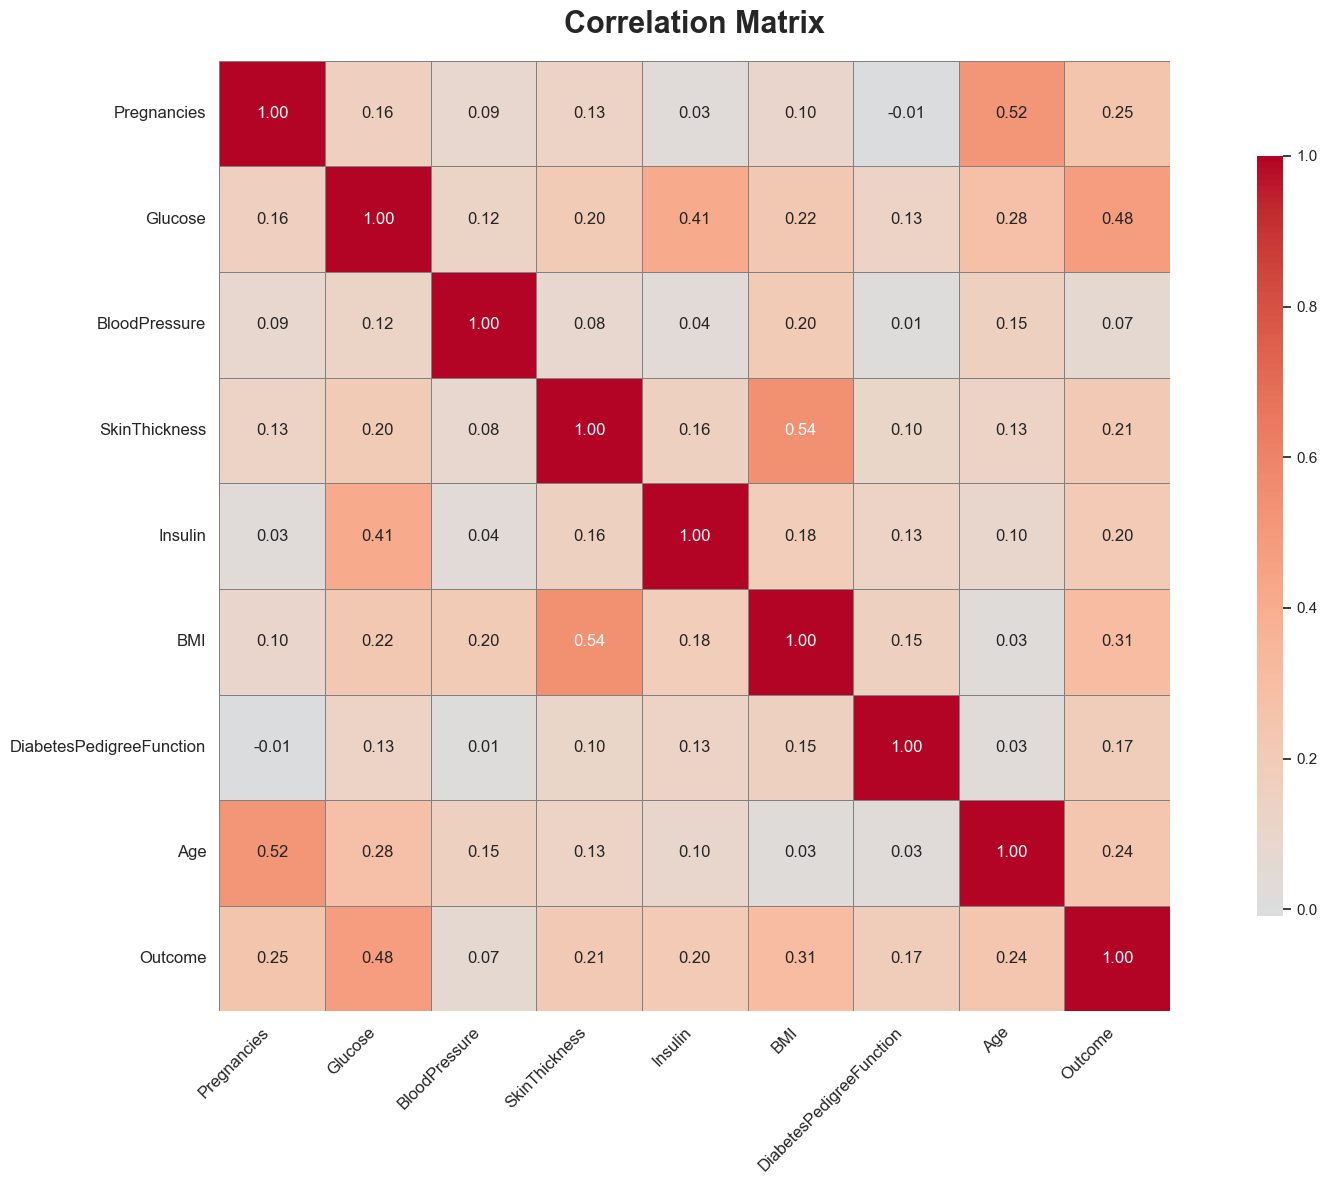

In [11]:
# Set theme and figure size
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(18, 12))

# Generate heatmap with enhanced styling
corr = df.corr()

# Use a diverging color palette for better contrast
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",   # More visually appealing color palette
    center=0,          # Center color scale around 0
    square=True,       # Square cells
    linewidths=0.5,    # Add lines between cells
    linecolor='gray',  # Line color
    cbar_kws={"shrink": 0.8, "aspect": 30},  # Adjust color bar size
    ax=ax
)

# Add title and labels with improved styling
ax.set_title("Correlation Matrix", fontsize=22, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)

# Clean up layout
plt.tight_layout()
plt.show()

## DATA PREPROCESSING

## 2.1) Missing Observation Analysis

In [12]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,78,29,125,26.6,0.351,31,0
2,8,183,78,29,125,23.3,0.672,32,1
3,1,89,78,23,94,28.1,0.167,21,0
4,4,137,78,35,168,43.1,2.288,33,1


In [14]:
#missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

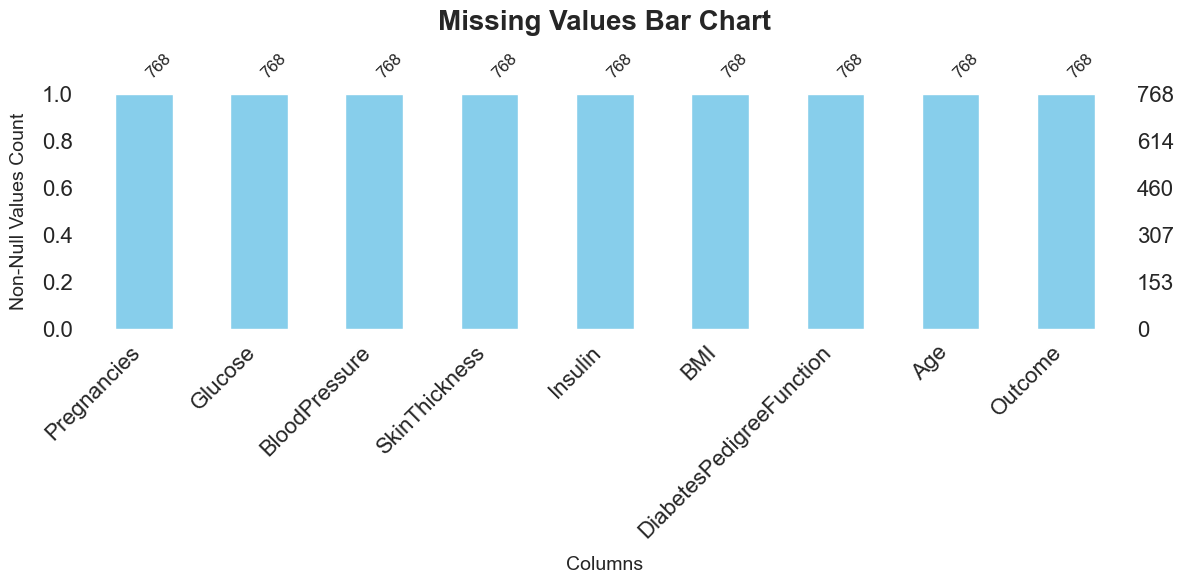

In [15]:
# Import the missingno library
import missingno as msno

# Visualize missing data with a bar plot

# missingno is a Python library used for visualizing missing values in datasets
# A full bar indicates no missing values.
# A shorter bar shows that the column has missing values.
# Each bar's height represents the percentage of non-null values
fig, ax = plt.subplots(figsize=(12, 6))
msno.bar(df, color='skyblue', ax=ax)

# Enhance plot styling
ax.set_title('Missing Values Bar Chart', fontsize=20, fontweight='bold', pad=15)
ax.set_xlabel('Columns', fontsize=14, labelpad=10)
ax.set_ylabel('Non-Null Values Count', fontsize=14, labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()

In [16]:
# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [17]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,78,29,125,26.6,0.351,31,0
2,8,183,78,29,125,23.3,0.672,32,1
3,1,89,78,23,94,28.1,0.167,21,0
4,4,137,78,35,168,43.1,2.288,33,1


In [19]:
# Missing values were filled.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## OBSERVING OUTLIERS IN DATA


In [20]:
for feature in df:
    if pd.api.types.is_numeric_dtype(df[feature]):
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower = max(Q1 - 1.5 * IQR, df[feature].min())  # adjusted lower bound
        upper = Q3 + 1.5 * IQR

        print(f"{feature} lower bound: {lower}")
        print(f"{feature} upper bound: {upper}")

        if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
            print(feature, "has outliers")
        else:
            print(feature, "no outliers")
    else:
        print(feature, "non-numeric column")



Pregnancies lower bound: 1
Pregnancies upper bound: 12.0
Pregnancies has outliers
Glucose lower bound: 80
Glucose upper bound: 197.625
Glucose has outliers
BloodPressure lower bound: 70
BloodPressure upper bound: 87.5
BloodPressure has outliers
SkinThickness lower bound: 14.5
SkinThickness upper bound: 42.5
SkinThickness has outliers
Insulin lower bound: 112.875
Insulin upper bound: 135.875
Insulin has outliers
BMI lower bound: 18.2
BMI upper bound: 50.25
BMI has outliers
DiabetesPedigreeFunction lower bound: 0.078
DiabetesPedigreeFunction upper bound: 1.2
DiabetesPedigreeFunction has outliers
Age lower bound: 21
Age upper bound: 66.5
Age has outliers
Outcome lower bound: 0
Outcome upper bound: 2.5
Outcome no outliers


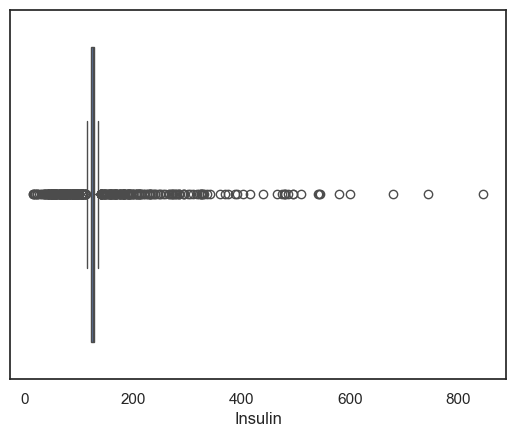

In [21]:
sns.boxplot(x = df["Insulin"]);

## FINDING LOCAL OUTLIER FACTOR


In [22]:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [23]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.38135613, -2.96841398, -2.63673617, -2.54908137, -2.36837099,
       -2.05069567, -1.93276967, -1.8753819 , -1.73693895, -1.73338301,
       -1.71871173, -1.68380678, -1.67282738, -1.65161809, -1.63268039,
       -1.62454169, -1.61649066, -1.61371825, -1.6090176 , -1.59839725,
       -1.59684695, -1.57499051, -1.56543936, -1.54446542, -1.5430739 ,
       -1.53577936, -1.53370618, -1.52571835, -1.51407296, -1.51050897])

In [24]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

np.float64(-1.8753819048124558)

In [25]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [26]:
# The size of the data set was examined.
df.shape

(760, 9)

## MODIFYING DATASET WITH THE PARAMETERS WHICH HAVE HIGHER EFFECT ON RESULTS

In [27]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148,72,35,125,33.6,0.627,50,1,Obesity 1
1,1,85,78,29,125,26.6,0.351,31,0,Overweight
2,8,183,78,29,125,23.3,0.672,32,1,Normal
3,1,89,78,23,94,28.1,0.167,21,0,Overweight
4,4,137,78,35,168,43.1,2.288,33,1,Obesity 3


In [29]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [30]:
# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148,72,35,125,33.6,0.627,50,1,Obesity 1,Normal
1,1,85,78,29,125,26.6,0.351,31,0,Overweight,Normal
2,8,183,78,29,125,23.3,0.672,32,1,Normal,Normal
3,1,89,78,23,94,28.1,0.167,21,0,Overweight,Normal
4,4,137,78,35,168,43.1,2.288,33,1,Obesity 3,Abnormal


In [31]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148,72,35,125,33.6,0.627,50,1,Obesity 1,Normal,High
1,1,85,78,29,125,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183,78,29,125,23.3,0.672,32,1,Normal,Normal,High
3,1,89,78,23,94,28.1,0.167,21,0,Overweight,Normal,Normal
4,4,137,78,35,168,43.1,2.288,33,1,Obesity 3,Abnormal,High


## ONE HOT ENCODING

In [33]:

# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [34]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,6,148,72,35,125,33.6,0.627,50,1,True,False,False,False,False,True,False,False,False
1,1,85,78,29,125,26.6,0.351,31,0,False,False,False,True,False,True,False,True,False
2,8,183,78,29,125,23.3,0.672,32,1,False,False,False,False,False,True,False,False,False
3,1,89,78,23,94,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False
4,4,137,78,35,168,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False


In [35]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight']]

In [36]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,True,False,False,False,False,True,False,False,False
1,False,False,False,True,False,True,False,True,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,True,False,True,False,True,False
4,False,False,True,False,False,False,False,False,False


In [37]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight'], axis = 1)
cols = X.columns
index = X.index

In [38]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,125,33.6,0.627,50
1,1,85,78,29,125,26.6,0.351,31
2,8,183,78,29,125,23.3,0.672,32
3,1,89,78,23,94,28.1,0.167,21
4,4,137,78,35,168,43.1,2.288,33


In [39]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [40]:
X = pd.concat([X,categorical_df], axis = 1)

In [41]:

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,0.50,0.763158,-1.2,0.857143,0.000000,0.144444,0.669707,1.235294,True,False,False,False,False,True,False,False,False
1,-0.75,-0.894737,0.0,0.000000,0.000000,-0.633333,-0.049511,0.117647,False,False,False,True,False,True,False,True,False
2,1.00,1.684211,0.0,0.000000,0.000000,-1.000000,0.786971,0.176471,False,False,False,False,False,True,False,False,False
3,-0.75,-0.789474,0.0,-0.857143,-6.888889,-0.466667,-0.528990,-0.470588,False,False,False,True,False,True,False,True,False
4,0.00,0.473684,0.0,0.857143,9.555556,1.200000,4.998046,0.235294,False,False,True,False,False,False,False,False,False


In [42]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [43]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

LR: 0.768421 (0.047514)
KNN: 0.709211 (0.044988)
CART: 0.703947 (0.049320)
RF: 0.768421 (0.050000)
SVM: 0.734211 (0.056072)
XGB: 0.763158 (0.044814)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 243, number of negative: 441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 684, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355263 -> initscore=-0.595983
[LightGBM] [Info] Start training from score -0.595983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

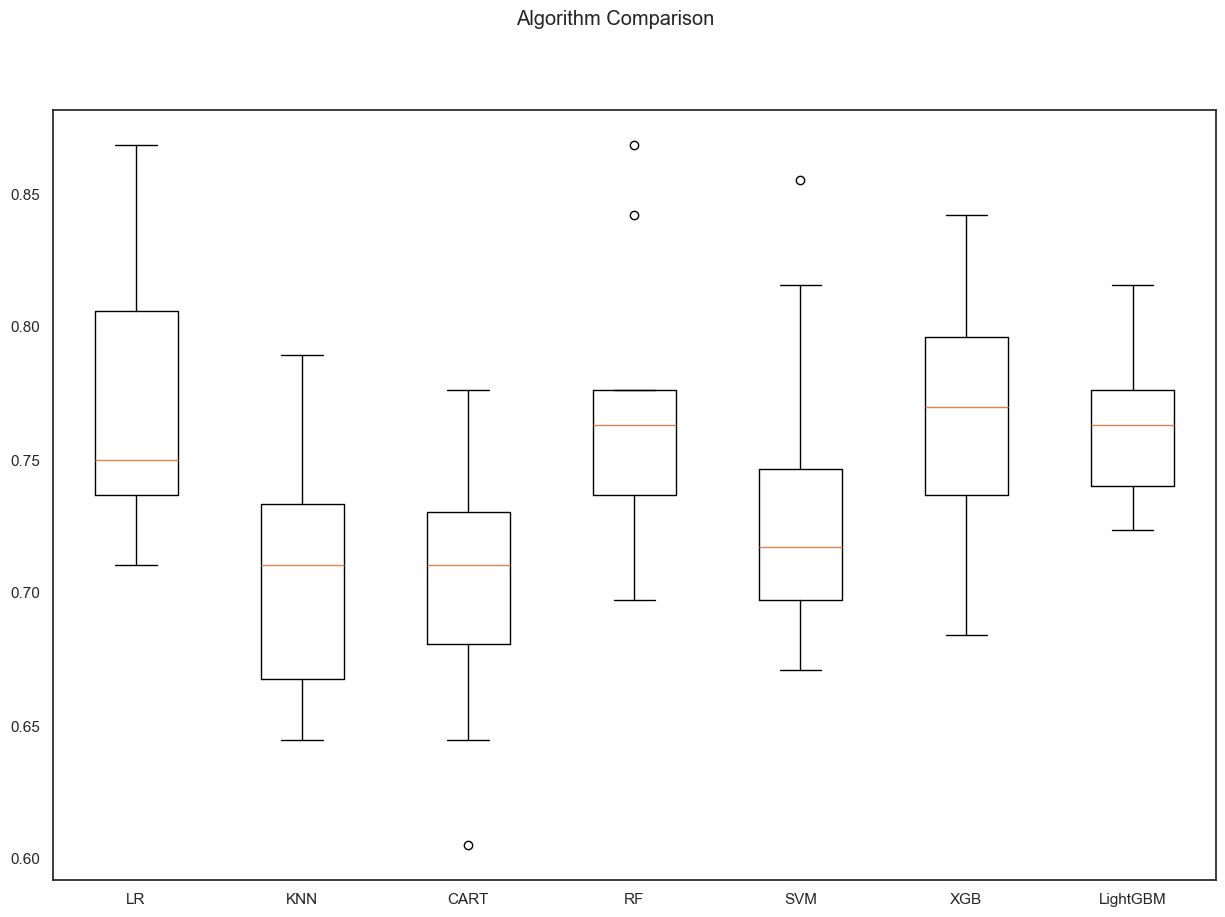

In [44]:
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=12345)  # Add shuffle=True
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")  # Use kfold object here
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [45]:
rf_params = {"n_estimators" :[100,200,500,1000],
             "max_features": [3,5,7],
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

## MODEL TUNING

## 1). RANDOM FOREST TUNING

In [46]:
rf_model = RandomForestClassifier(random_state = 12345)

In [47]:
from sklearn.model_selection import GridSearchCV
gs_cv = GridSearchCV(rf_model,
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [48]:
gs_cv.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

## FINAL MODEL INSTALLATION

In [49]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [50]:
rf_tuned = rf_tuned.fit(X,y)

In [51]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

np.float64(0.7592105263157893)

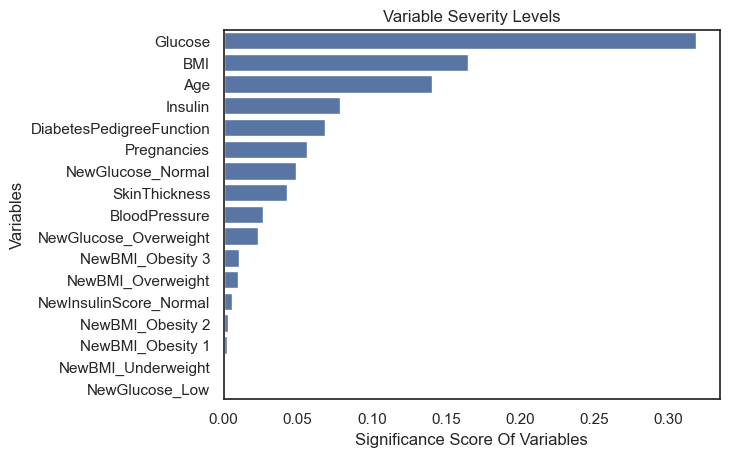

In [52]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

## LIGHT GBM TUNING

In [53]:
lgbm = LGBMClassifier(random_state = 12345)

In [54]:
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

In [55]:
gs_cv = GridSearchCV(lgbm,
                     lgbm_params,
                     cv = 10,
                     n_jobs = -1,
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 264, number of negative: 496
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 760, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.347368 -> initscore=-0.630627
[LightGBM] [Info] Start training from score -0.630627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [56]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

## FINAL MODEL INSTALLATION

In [57]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 264, number of negative: 496
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 760, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.347368 -> initscore=-0.630627
[LightGBM] [Info] Start training from score -0.630627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [58]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 237, number of negative: 447
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 684, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346491 -> initscore=-0.634498
[LightGBM] [Info] Start training from score -0.634498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

np.float64(0.775)

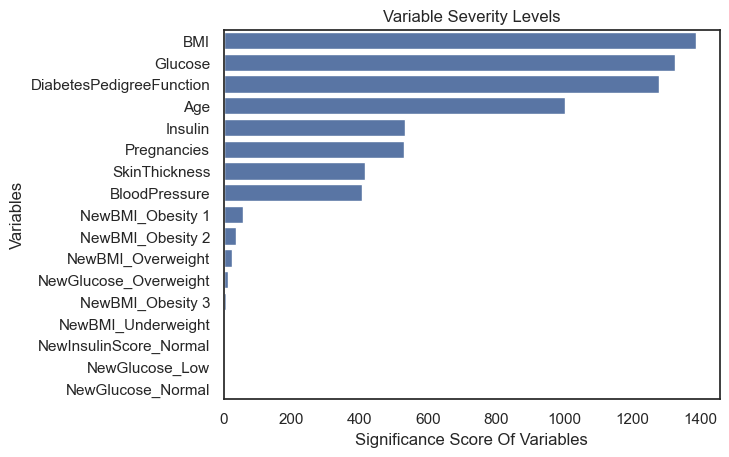

In [59]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

## XG BOOST TUNING

In [60]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [61]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [62]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [63]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': np.float64(0.4111111111111111),
 'n_estimators': 100,
 'subsample': 1.0}

## FINAL MODEL INATALLATION

In [64]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [65]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

np.float64(0.7750000000000001)

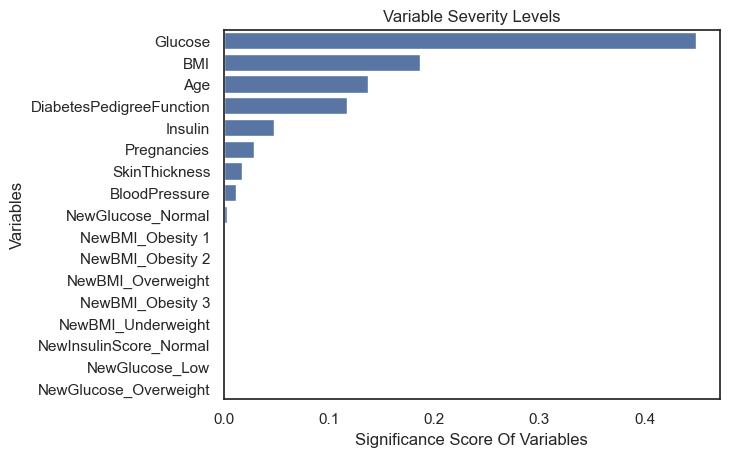

In [66]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

## COMPARISON OF FINAL MODELS

In [67]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

RF: 0.765789 (0.050892)
XGB: 0.761842 (0.031386)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 243, number of negative: 441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 684, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.355263 -> initscore=-0.595983
[LightGBM] [Info] Start training from score -0.595983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

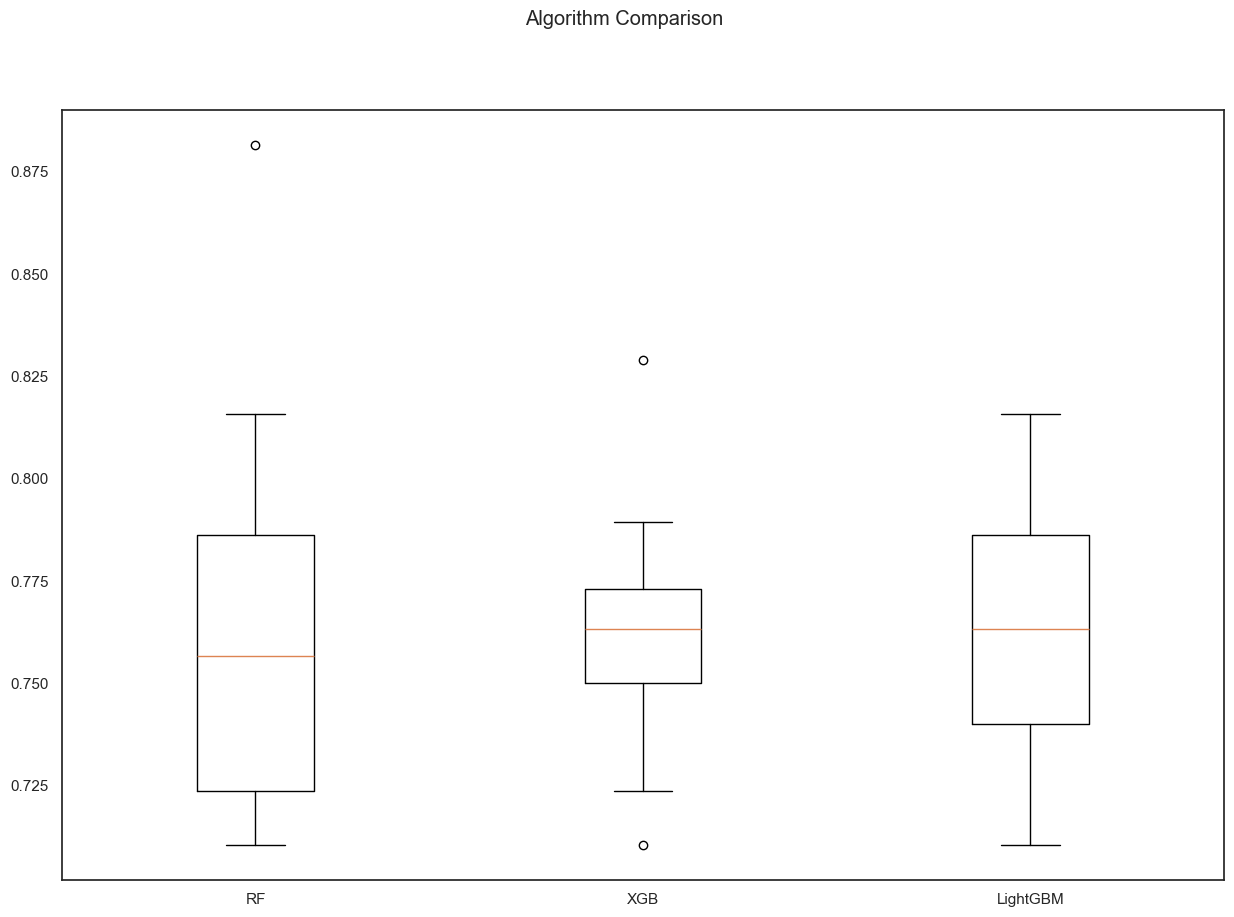

In [68]:
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

# Clear previous results
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=12345)  # Added shuffle=True
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")

    results.append(cv_results)
    names.append(name)

    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot for comparison
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


## FINAL ACCURACY 77%